In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

In [40]:
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA

In [2]:
df = pd.read_csv("SPY1Min.csv")

In [3]:
df1 = df.copy()

In [4]:
df1.head(10)

,DateTime,marketClose
0,2019-04-02 09:30:00,300.000
1,2019-04-02 09:31:00,292.970
2,2019-04-02 09:32:00,295.120
3,2019-04-02 09:33:00,296.280
4,2019-04-02 09:34:00,296.570
5,2019-04-02 09:35:00,297.900
6,2019-04-02 09:36:00,294.873
7,2019-04-02 09:37:00,295.160
8,2019-04-02 09:38:00,294.560
9,2019-04-02 09:39:00,297.519


In [5]:
df1.describe()

,marketClose
count,96327.000000
mean,305.436257
std,21.554990
min,219.800000
25%,295.030000
50%,304.340000
75%,318.709000
max,355.690000


In [6]:
df1.isna().sum()

DateTime         0
marketClose    175
dtype: int64

In [7]:
df1.isna().sum()

DateTime         0
marketClose    175
dtype: int64

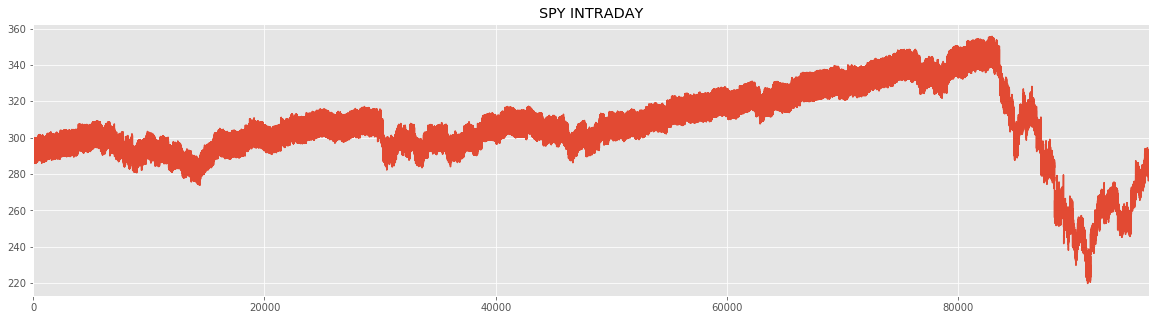

In [9]:
df1.marketClose.plot(figsize = (20,5), title = "SPY INTRADAY")
plt.show()

In [10]:
# Time Series(stock price) data does not follow normal distribution because it does not follow Gauss-Markov assumption

In [11]:
import scipy.stats
import pylab

### X axis - Theoritical quantiles is how many standard deviaiton away from mean
### Y axis - Stock Prices


In [12]:
# Quantile-Quantile plot(QQ plot) is used to check whether the distribution is normal or not

C:\Users\TAN\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\TAN\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\TAN\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


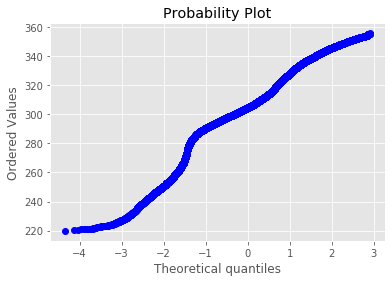

In [13]:
scipy.stats.probplot(df1.marketClose,plot = pylab)
pylab.show()

In [14]:
###Not Normally distributed as it is not following linear graph

In [15]:
#df1["DateTime"] =  df1['Date'] + ' ' + df1['Time']

In [16]:
df1.head(10)

,DateTime,marketClose
0,2019-04-02 09:30:00,300.000
1,2019-04-02 09:31:00,292.970
2,2019-04-02 09:32:00,295.120
3,2019-04-02 09:33:00,296.280
4,2019-04-02 09:34:00,296.570
5,2019-04-02 09:35:00,297.900
6,2019-04-02 09:36:00,294.873
7,2019-04-02 09:37:00,295.160
8,2019-04-02 09:38:00,294.560
9,2019-04-02 09:39:00,297.519


In [17]:
df1['DateTime'] = pd.to_datetime(df1.DateTime,dayfirst = True)

In [18]:
df1.head(10)

,DateTime,marketClose
0,2019-04-02 09:30:00,300.000
1,2019-04-02 09:31:00,292.970
2,2019-04-02 09:32:00,295.120
3,2019-04-02 09:33:00,296.280
4,2019-04-02 09:34:00,296.570
5,2019-04-02 09:35:00,297.900
6,2019-04-02 09:36:00,294.873
7,2019-04-02 09:37:00,295.160
8,2019-04-02 09:38:00,294.560
9,2019-04-02 09:39:00,297.519


In [19]:
df1.DateTime.describe()

count                   96502
unique                  96502
top       2019-05-21 11:43:00
freq                        1
first     2019-04-02 09:30:00
last      2020-04-09 15:59:00
Name: DateTime, dtype: object

In [20]:
#df1 = df1.drop(['Date','Time'],axis=1)

In [21]:
#df1.head(10)

In [22]:
df1 = df1.set_index(df1['DateTime'])

In [23]:
df1.head(5)

,DateTime,marketClose
DateTime,,
2019-04-02 09:30:00,2019-04-02 09:30:00,300.00
2019-04-02 09:31:00,2019-04-02 09:31:00,292.97
2019-04-02 09:32:00,2019-04-02 09:32:00,295.12
2019-04-02 09:33:00,2019-04-02 09:33:00,296.28
2019-04-02 09:34:00,2019-04-02 09:34:00,296.57


In [24]:
df1 = df1.drop(['DateTime'],axis=1)

In [25]:
df1.head(5)

,marketClose
DateTime,
2019-04-02 09:30:00,300.00
2019-04-02 09:31:00,292.97
2019-04-02 09:32:00,295.12
2019-04-02 09:33:00,296.28
2019-04-02 09:34:00,296.57


In [26]:
df2 = df1.copy()

In [27]:
df2 = df2.dropna()

In [28]:
df2.isna().sum()

marketClose    0
dtype: int64

##Setting the desired frequency

In [29]:
df_comp = df2.resample('5Min').mean()

In [30]:
df_comp.head(90)

,marketClose
DateTime,
2019-04-02 09:30:00,296.1880
2019-04-02 09:35:00,296.0024
2019-04-02 09:40:00,288.9542
2019-04-02 09:45:00,292.1286
2019-04-02 09:50:00,292.0962
...,...
2019-04-02 16:35:00,NaN
2019-04-02 16:40:00,NaN
2019-04-02 16:45:00,NaN


In [31]:
df_comp = df_comp.dropna()

In [32]:
df2.isna().sum()

marketClose    0
dtype: int64

In [33]:
df2.head(3)

,marketClose
DateTime,
2019-04-02 09:30:00,300.00
2019-04-02 09:31:00,292.97
2019-04-02 09:32:00,295.12


### Working on df2 as it already resampled to 5 min


###If you want to fill missing values, you can use following methods to fill missing values
df2.Close = df2.Close.fillna(method = 'ffill')
df2.Close = df2.Close.fillna(method = 'bfill')
df2.Close = df2.Close.fillna(value = df2.Close.mean())

## 

In [34]:
size = int(len(df2)*0.8)

In [35]:
df_train = df2.iloc[:size]

In [36]:
df_test = df2.iloc[size:]

In [37]:
df_train.tail(5)

,marketClose
DateTime,
2020-01-28 10:48:00,339.144
2020-01-28 10:49:00,330.300
2020-01-28 10:50:00,336.910
2020-01-28 10:51:00,330.080
2020-01-28 10:52:00,328.190


In [38]:
df_test.head(5)

,marketClose
DateTime,
2020-01-28 10:53:00,336.820
2020-01-28 10:54:00,329.810
2020-01-28 10:55:00,326.860
2020-01-28 10:56:00,336.018
2020-01-28 10:57:00,327.470


## WHITE NOISE

In [39]:
# A time series is white noise if the variables are independent and identically distributed with a mean of zero. 
# This means that all variables have the same variance (sigma^2) and each value has a zero correlation with all other values
# in the series

In [40]:
#If a time series is white noise, it is a sequence of random numbers and cannot be predicted. If the series of forecast
#errors are not white noise, it suggests improvements could be made to the predictive model.

In [41]:
wn = np.random.normal(loc = df_train.marketClose.mean(), scale = df_train.marketClose.std(), size = len(df_train))

In [42]:
df_train['wn'] = wn

C:\Users\TAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
df_train.describe()

,marketClose,wn
count,77061.000000,77061.000000
mean,307.448464,307.435908
std,14.233115,14.235983
min,273.760000,244.132041
25%,297.100000,297.794638
50%,304.514000,307.444304
75%,315.690000,317.044003
max,348.600000,375.620765


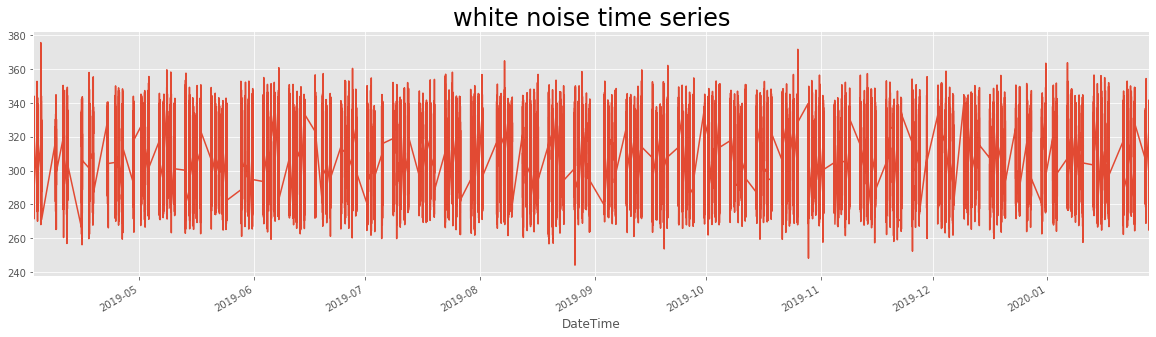

In [44]:
df_train.wn.plot(figsize = (20,5))
plt.title('white noise time series',size=24)
plt.show()

In [45]:
df_train.head(10)

,marketClose,wn
DateTime,,
2019-04-02 09:30:00,300.000,312.233054
2019-04-02 09:31:00,292.970,311.052465
2019-04-02 09:32:00,295.120,293.960520
2019-04-02 09:33:00,296.280,317.484875
2019-04-02 09:34:00,296.570,303.763361
2019-04-02 09:35:00,297.900,330.089129
2019-04-02 09:36:00,294.873,320.245540
2019-04-02 09:37:00,295.160,320.395293
2019-04-02 09:38:00,294.560,318.024680


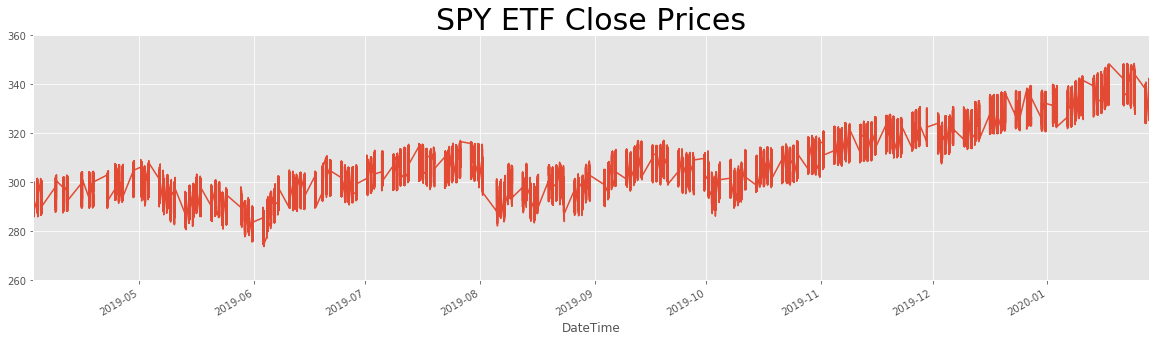

In [46]:
df_train.marketClose.plot(figsize = (20,5))
plt.title('SPY ETF Close Prices',size=30)
plt.ylim(260,360)
plt.show()

# Random Walk Leave now

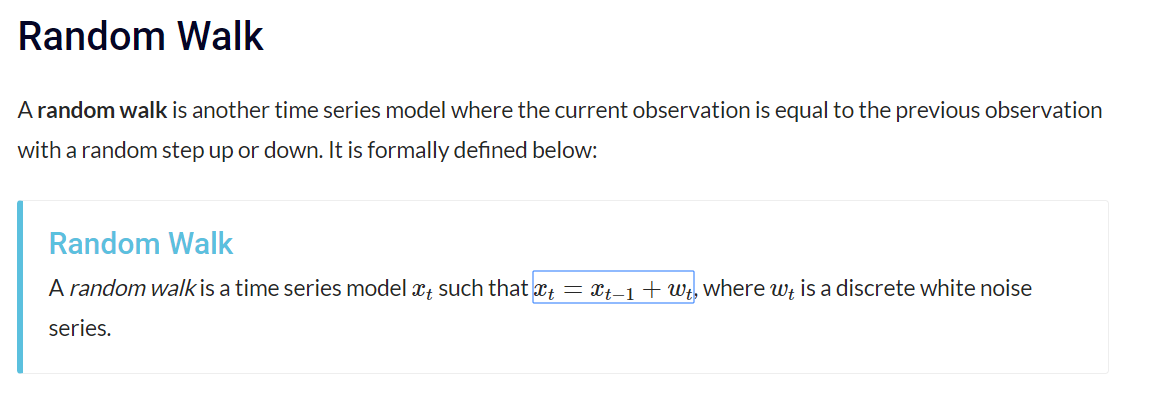

In [47]:
# rw = pd.read_csv("C:/Users/TAN/Downloads/RandWalk.csv")

In [48]:
#rw.head(5)

In [49]:
# rw.date = pd.to_datetime(rw.date,dayfirst = True)
# rw.set_index("date",inplace=True)
# rw = rw.asfreq('b')

In [50]:
#df_train['rw'] = rw['price']


In [51]:
#df_train['rw'] = df_train.rw.fillna(value = df_train.rw.mean())

In [52]:
#df_train = df_train.rw.fillna(df_train.wn.mean())

In [53]:
#df_train.head(10)

In [54]:
# df_train.rw.plot(figsize=(20,5))
# plt.title("Random Walk",size=24)
# plt.show()

# STATIONARITY

In [55]:
df_train.head(5)

,marketClose,wn
DateTime,,
2019-04-02 09:30:00,300.00,312.233054
2019-04-02 09:31:00,292.97,311.052465
2019-04-02 09:32:00,295.12,293.960520
2019-04-02 09:33:00,296.28,317.484875
2019-04-02 09:34:00,296.57,303.763361


In [56]:
import statsmodels.tsa.stattools as sts

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [57]:
sts.adfuller(df_train.marketClose)

(-1.3837772678752445,
 0.5900283177648608,
 64,
 76996,
 {'1%': -3.4304349332176307,
  '5%': -2.861577539027958,
  '10%': -2.566789980732537},
 447085.3544188962)

Null hypothesis - Data is not stationary and here  test statistic is greater than critical value so null hypothesis is not rejected.
Above output shows that data is not stationary
(P value is 0.59(59% chance that data is not stationary), t statistic > critical values(1%,5%,10%))
Autocorrelation coefficient is 4 (which is >1)

In [57]:
sts.adfuller(df_train.wn)

(-276.633886270512,
 0.0,
 0,
 77060,
 {'1%': -3.430434862676403,
  '5%': -2.861577507850389,
  '10%': -2.5667899641377123},
 627140.2185814114)

Above output shows that white noise (wn) data is stationary
(P value is 0.0(0% chance that data is not stationary-->100% chance that data is stationary)
 t statistic < critical values(1%,5%,10%))
 Autocorrelation coefficient is 0 (which is <1)

In [58]:
#sts.adfuller(rw.price)

In [59]:
# Same as the closing price

# Seasonality

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [43]:
s_dec_additive = seasonal_decompose(df_train.marketClose, model = "additive",freq=30)

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


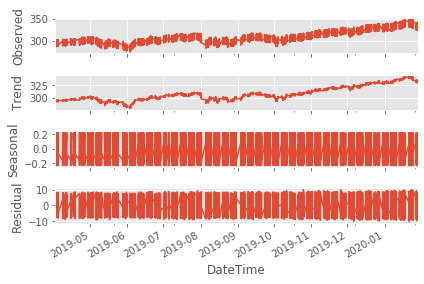

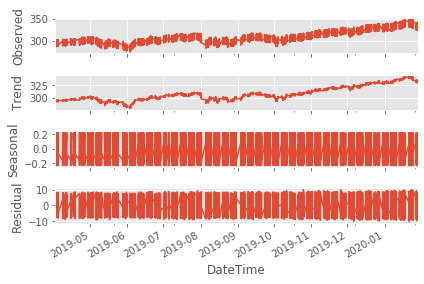

In [44]:
s_dec_additive.plot()

In [45]:
####Data is not seasonal as there is not concrete cyclical pattern

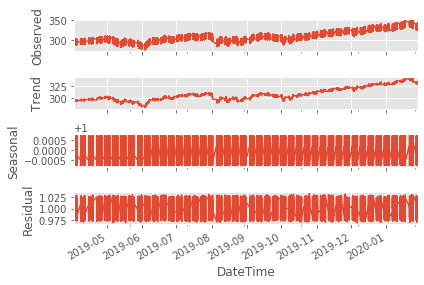

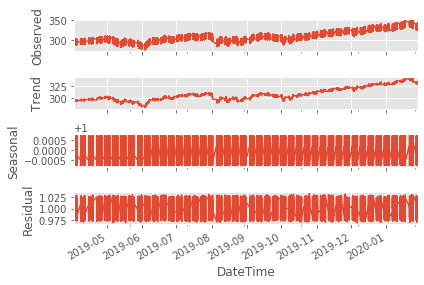

In [46]:
s_dec_multiplicative = seasonal_decompose(df_train.marketClose, model = "multiplicative",freq=30)
s_dec_multiplicative.plot()

# Autocorrelation ACF

In [69]:
# A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. 
# This plot is sometimes called a correlogram or an autocorrelation plot. ... Running the example creates a 2D plot showing the
# lag value along the x-axis and the correlation on the y-axis between -1 and 1

In [92]:
import statsmodels.graphics.tsaplots as sgt

Text(0.5, 1.0, 'ACF LAG')

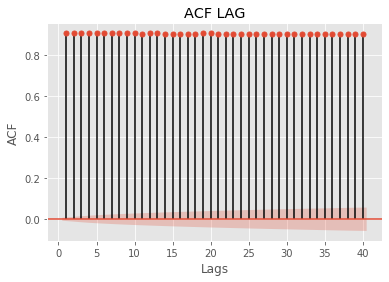

In [71]:
sgt.plot_acf(df_train.marketClose,lags=40,zero=False)
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.title("ACF LAG")

In [72]:
###Stock prices have been consistent till 40 lags, range of ACF varies from -1 to +1
##Shadow area is the Significance
##We can estimate our prediction even through 40 lags
###The greater the distance in time, the more unlikely that autocorrelation exists
###all the lines are higher than the significance, which means this is the indicator of time dependence in the data
###Prices even a month back can serve as decent estimators
###SPY ETF high frequency data prices is highly autocorrelated

Text(0.5, 1.0, 'WHITE NOISE')

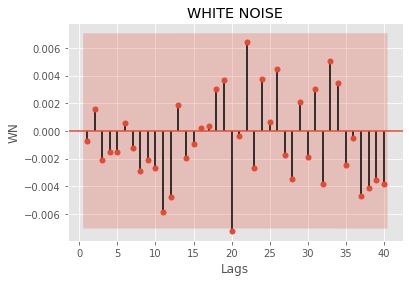

In [73]:
sgt.plot_acf(df_train.wn,lags=40,zero=False)
plt.xlabel('Lags')
plt.ylabel('WN')
plt.title("WHITE NOISE")

In [94]:
###no autocorrelation in lags for white noise
# White noise represents residuals which should be highly significant as shown by significance level
# It means they are not similar or dependent on the past values

# Partial Autocorrelation function

Text(0.5, 1.0, 'PACF LAG')

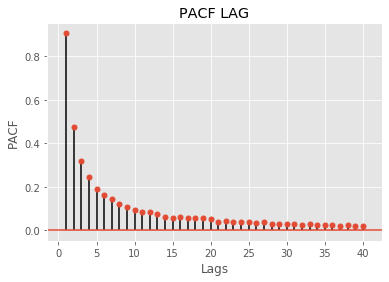

In [75]:
sgt.plot_pacf(df_train.marketClose,lags=40,zero=False,alpha=0.5,method = 'ols')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.title("PACF LAG")

In [76]:
###First lag for ACF and PACF is same because there is no value in between one lag and current price
###After some lags all other values are nearly zero, doesn't have any significance so no affect

Text(0.5, 1.0, 'PACF WN')

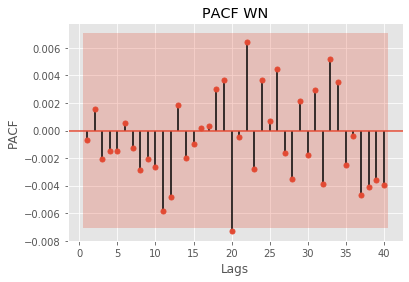

In [77]:
sgt.plot_pacf(df_train.wn,lags=40,zero=False,method = 'ols')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.title("PACF WN")

In [78]:
###Again proved no autocorrelation in white noise

# Autoregressive MA model for one lag

In [79]:
# #An autoregressive model is when a value from a time series is regressed on previous values from that same time series. ... 
# The order of an autoregression is the number of immediately preceding values in the series that are used to predict the value
# at the present time.

In [64]:
from statsmodels.tsa.arima_model import ARMA

# AR 1 Model

In [81]:
model_ar = ARMA(df_train.marketClose,order = (1,0))
# 1 in order represent number of lags, 0 means not taking into residual values into the consideration
# The above is the simple AR(1) model

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [82]:
results_ar = model_ar.fit()

In [83]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            marketClose   No. Observations:                77061
Model:                     ARMA(1, 0)   Log Likelihood             -247416.922
Method:                       css-mle   S.D. of innovations              6.000
Date:                Tue, 19 May 2020   AIC                         494839.843
Time:                        20:46:43   BIC                         494867.600
Sample:                             0   HQIC                        494848.367
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               307.4502      0.232   1325.761      0.000     306.996     307.905
ar.L1.marketClose     0.9068      0.002    597.205      0.000       0.904       0.910
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1028           +0.0000j            1.1028            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
# Always remember - model with lower AIC, BIC and higher Information criteria(IC) is better 

In [84]:
#const is the constant
#ar.L1.market_value is the coefficient of 1 lag ago
#standard error - how far away the model predictions from the true value
#z value - associated test statistics for significance
# p value = 0 means constant and one lag value are both significantly different from zero
# last two columns represent the critical values for 95% confidence interval, if zero is not a part of it we can confirm that
# coefficients are significant

In [85]:
# Since one lag is significant, we move towards higher lag to build more accurate model which will be more complex

# Fitting Higher -Lags AR models for Prices

# AR 2 Model

In [86]:
model_ar_2 = ARMA(df_train.marketClose,order = [2,0])
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            marketClose   No. Observations:                77061
Model:                     ARMA(2, 0)   Log Likelihood             -237454.073
Method:                       css-mle   S.D. of innovations              5.272
Date:                Tue, 19 May 2020   AIC                         474916.147
Time:                        20:46:49   BIC                         474953.156
Sample:                             0   HQIC                        474927.512
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               307.4529      0.390    788.665      0.000     306.689     308.217
ar.L1.marketClose     0.4740      0.003    149.733      0.000       0.468       0.480
ar.L2.marketClose     0.4773      0.003    150.796      0.000       0.471       0.484
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0337           +0.0000j            1.0337            0.0000
AR.2           -2.0266           +0.0000j            2.0266            0.5000
-----------------------------------------------------------------------------
"""

In [87]:
model_ar_3 = ARMA(df_train.marketClose,order = [3,0])
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            marketClose   No. Observations:                77061
Model:                     ARMA(3, 0)   Log Likelihood             -233260.139
Method:                       css-mle   S.D. of innovations              4.993
Date:                Tue, 19 May 2020   AIC                         466530.278
Time:                        20:46:51   BIC                         466576.539
Sample:                             0   HQIC                        466544.483
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               307.4578      0.544    565.363      0.000     306.392     308.524
ar.L1.marketClose     0.3207      0.003     93.996      0.000       0.314       0.327
ar.L2.marketClose     0.3251      0.003     95.459      0.000       0.318       0.332
ar.L3.marketClose     0.3212      0.003     94.136      0.000       0.314       0.328
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0169           -0.0000j            1.0169           -0.0000
AR.2           -1.0146           -1.4257j            1.7499           -0.3484
AR.3           -1.0146           +1.4257j            1.7499            0.3484
-----------------------------------------------------------------------------
"""

In [88]:
model_ar_4 = ARMA(df_train.marketClose,order = [4,0])
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            marketClose   No. Observations:                77061
Model:                     ARMA(4, 0)   Log Likelihood             -230846.545
Method:                       css-mle   S.D. of innovations              4.839
Date:                Tue, 19 May 2020   AIC                         461705.089
Time:                        20:46:54   BIC                         461760.603
Sample:                             0   HQIC                        461722.136
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               307.4641      0.699    439.646      0.000     306.093     308.835
ar.L1.marketClose     0.2415      0.003     69.182      0.000       0.235       0.248
ar.L2.marketClose     0.2450      0.003     70.192      0.000       0.238       0.252
ar.L3.marketClose     0.2421      0.003     69.366      0.000       0.235       0.249
ar.L4.marketClose     0.2464      0.003     70.581      0.000       0.240       0.253
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0101           -0.0000j            1.0101           -0.0000
AR.2           -1.6476           -0.0000j            1.6476           -0.5000
AR.3           -0.1726           -1.5520j            1.5616           -0.2676
AR.4           -0.1726           +1.5520j            1.5616            0.2676
-----------------------------------------------------------------------------
"""

In [89]:
model_ar_5 = ARMA(df_train.marketClose,order = (5,0))
results_ar_5 = model_ar_5.fit()
print(results_ar_5.summary())

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:            marketClose   No. Observations:                77061
Model:                     ARMA(5, 0)   Log Likelihood             -229420.397
Method:                       css-mle   S.D. of innovations              4.750
Date:                Tue, 19 May 2020   AIC                         458854.794
Time:                        20:46:59   BIC                         458919.560
Sample:                             0   HQIC                        458874.682
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               307.4727      0.848    362.478      0.000     305.810     309.135
ar.L1.marketClose     0.1946      0.004     55.016      0.000       0.188       0.201
ar.L2.marketClose     0.

In [90]:
# Higher Log Likelihood and lower Information Criteris means better model

In [91]:
## Log likelihood should increas and information criteria(AIC,BIC,HQIC) should decrease
# p < 0.05 --> lags are significant different and can be used for prediction
# p > 0.05 ---> Insignigicant to predict using this lag

In [92]:
# Log Likelohood test to compare multiple lag models and decide till what lag we can take

In [93]:
#In statistics, the likelihood-ratio test assesses the goodness of fit of two competing statistical 
#models based on the ratio of their likelihoods, specifically one found by maximization over 
#the entire parameter space and another found after imposing some constraint
# more lags more better model

In [34]:
from scipy.stats import chi2
def LLR(mod1,mod2,DF=1):
    L1 = mod1.llf
    L2 = mod2.llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR,DF).round(3)
    return p

In [95]:
LLR(results_ar_2,results_ar_3)

0.0

In [96]:
model_ar_5 = ARMA(df_train.marketClose,order = (5,0))
results_ar_5 = model_ar_5.fit()
print(results_ar_5.summary())
print("LLR Test: " + str(LLR(results_ar_2,results_ar_5)))

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:            marketClose   No. Observations:                77061
Model:                     ARMA(5, 0)   Log Likelihood             -229420.397
Method:                       css-mle   S.D. of innovations              4.750
Date:                Tue, 19 May 2020   AIC                         458854.794
Time:                        20:47:19   BIC                         458919.560
Sample:                             0   HQIC                        458874.682
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               307.4727      0.848    362.478      0.000     305.810     309.135
ar.L1.marketClose     0.1946      0.004     55.016      0.000       0.188       0.201
ar.L2.marketClose     0.

In [97]:
model_ar_6 = ARMA(df_train.marketClose,order = (6,0))
results_ar_6 = model_ar_6.fit()
print(results_ar_6.summary())
print("LLR Test: " + str(LLR(results_ar_2,results_ar_6)))

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:            marketClose   No. Observations:                77061
Model:                     ARMA(6, 0)   Log Likelihood             -228407.058
Method:                       css-mle   S.D. of innovations              4.688
Date:                Tue, 19 May 2020   AIC                         456830.116
Time:                        20:47:48   BIC                         456904.135
Sample:                             0   HQIC                        456852.845
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               307.4827      0.998    308.108      0.000     305.527     309.439
ar.L1.marketClose     0.1638      0.004     46.084      0.000       0.157       0.171
ar.L2.marketClose     0.

In [98]:
model_ar_7 = ARMA(df_train.marketClose,order = (7,0))
results_ar_7 = model_ar_7.fit()
print(results_ar_7.summary())
print("LLR Test: " + str(LLR(results_ar_6,results_ar_7)))

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:            marketClose   No. Observations:                77061
Model:                     ARMA(7, 0)   Log Likelihood             -227616.280
Method:                       css-mle   S.D. of innovations              4.640
Date:                Tue, 19 May 2020   AIC                         455250.561
Time:                        20:47:55   BIC                         455333.832
Sample:                             0   HQIC                        455276.131
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               307.4972      1.152    266.923      0.000     305.239     309.755
ar.L1.marketClose     0.1409      0.004     39.510      0.000       0.134       0.148
ar.L2.marketClose     0.

In [93]:
model_ar_8 = ARMA(df_train.marketClose,order = (8,0))
results_ar_8 = model_ar_8.fit()
print(results_ar_8.summary())
print("LLR Test: " + str(LLR(results_ar_7,results_ar_8)))

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:            marketClose   No. Observations:                77061
Model:                     ARMA(8, 0)   Log Likelihood             -227032.698
Method:                       css-mle   S.D. of innovations              4.605
Date:                Tue, 05 May 2020   AIC                         454085.397
Time:                        14:35:40   BIC                         454177.920
Sample:                             0   HQIC                        454113.808
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               307.5089      1.303    235.961      0.000     304.955     310.063
ar.L1.marketClose     0.1234      0.004     34.515      0.000       0.116       0.130
ar.L2.marketClose     0.

In [94]:
model_ar_9 = ARMA(df_train.marketClose,order = (9,0))
results_ar_9 = model_ar_9.fit()
print(results_ar_9.summary())
print("LLR Test: " + str(LLR(results_ar_8,results_ar_9)))

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:            marketClose   No. Observations:                77061
Model:                     ARMA(9, 0)   Log Likelihood             -226583.220
Method:                       css-mle   S.D. of innovations              4.578
Date:                Tue, 05 May 2020   AIC                         453188.440
Time:                        14:35:57   BIC                         453290.216
Sample:                             0   HQIC                        453219.693
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               307.5249      1.452    211.724      0.000     304.678     310.372
ar.L1.marketClose     0.1102      0.004     30.767      0.000       0.103       0.117
ar.L2.marketClose     0.

In [99]:
# Higher lag models are good fit but this is beacuse the prices are highly correlated hence not stationary as resulted from 
# Dickey Fuller Test
# We should take returns

# Returns

In [35]:
df.head(2)

,DateTime,marketClose
0,2019-04-02 09:30:00,300.00
1,2019-04-02 09:31:00,292.97


In [47]:
df2['returns'] = df2.marketClose.pct_change(1).mul(100)

In [48]:
df3 = df2.iloc[1:]

In [49]:
df3.head(10)

,marketClose,returns
DateTime,,
2019-04-02 09:31:00,292.970,-2.343333
2019-04-02 09:32:00,295.120,0.733864
2019-04-02 09:33:00,296.280,0.393060
2019-04-02 09:34:00,296.570,0.097880
2019-04-02 09:35:00,297.900,0.448461
2019-04-02 09:36:00,294.873,-1.016113
2019-04-02 09:37:00,295.160,0.097330
2019-04-02 09:38:00,294.560,-0.203280
2019-04-02 09:39:00,297.519,1.004549


In [108]:
sts.adfuller(df3.returns)

(-54.965223212211036,
 0.0,
 60,
 96265,
 {'1%': -3.4304179320041697,
  '5%': -2.8615700248687177,
  '10%': -2.566785981189216},
 346007.8094200365)

In [109]:
# Test statistic is far less then the critical values, therefore null hypothesis is rejected --> Returns are stationary

In [110]:
## Transformed SPY stock close price which were non stationary as tested by adfuller test earlier are transformed
## to stationary series by replacing close price with returns


Text(0.5, 1.0, 'ACF for returns')

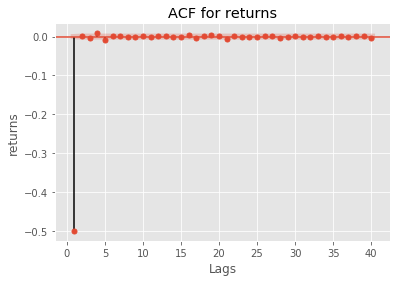

In [111]:
## ACF for returns
sgt.plot_acf(df3.returns,lags=40,zero=False)
plt.xlabel('Lags')
plt.ylabel('returns')
plt.title("ACF for returns")

Text(0.5, 1.0, 'PACF Returns')

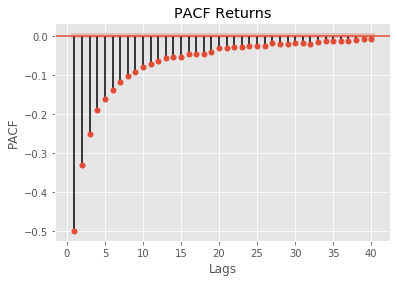

In [112]:
sgt.plot_pacf(df3.returns,lags=40,zero=False,method = 'ols')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.title("PACF Returns")

# AR Model For Returns

In [113]:
model_ret_ar_1 = ARMA(df3.returns,order=(1,0))

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [114]:
results_ret_ar_1 = model_ret_ar_1.fit()

In [115]:
results_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                96326
Model:                     ARMA(1, 0)   Log Likelihood             -189553.605
Method:                       css-mle   S.D. of innovations              1.731
Date:                Tue, 19 May 2020   AIC                         379113.211
Time:                        20:50:20   BIC                         379141.637
Sample:                             0   HQIC                        379121.852
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0199      0.004      5.363      0.000       0.013       0.027
ar.L1.returns    -0.5000      0.003   -179.180      0.000      -0.505      -0.495
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.0001           +0.0000j            2.0001            0.5000
-----------------------------------------------------------------------------
"""

In [116]:
# AR2 Model

In [117]:
model_ret_ar_2 = ARMA(df3.returns,order=(2,0))
results_ret_ar_2 = model_ret_ar_2.fit()
results_ret_ar_2.summary()

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                96326
Model:                     ARMA(2, 0)   Log Likelihood             -183967.506
Method:                       css-mle   S.D. of innovations              1.634
Date:                Tue, 19 May 2020   AIC                         367943.013
Time:                        20:50:24   BIC                         367980.915
Sample:                             0   HQIC                        367954.534
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0199      0.003      7.565      0.000       0.015       0.025
ar.L1.returns    -0.6654      0.003   -218.858      0.000      -0.671      -0.659
ar.L2.returns    -0.3309      0.003   -108.839      0.000      -0.337      -0.325
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0054           -1.4181j            1.7383           -0.3482
AR.2           -1.0054           +1.4181j            1.7383            0.3482
-----------------------------------------------------------------------------
"""

In [118]:
# model_ar_9 = ARMA(df_train.marketClose,order = (9,0))
# results_ar_9 = model_ar_9.fit()
# print(results_ar_9.summary())
print("LLR Test: " + str(LLR(results_ret_ar_1,results_ret_ar_2)))
# for better model one should have high log likelihood, low information criteria, p value less than 0.05

LLR Test: 0.0


In [119]:
model_ret_ar_3 = ARMA(df3.returns,order=(3,0))
results_ret_ar_3 = model_ret_ar_3.fit()
print(results_ret_ar_3.summary())
print("LLR Test: " + str(LLR(results_ret_ar_2,results_ret_ar_3)))

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                96326
Model:                     ARMA(3, 0)   Log Likelihood             -180817.523
Method:                       css-mle   S.D. of innovations              1.581
Date:                Tue, 19 May 2020   AIC                         361645.045
Time:                        20:50:29   BIC                         361692.423
Sample:                             0   HQIC                        361659.447
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0199      0.002      9.783      0.000       0.016       0.024
ar.L1.returns    -0.7487      0.003   -240.094      0.000      -0.755      -0.743
ar.L2.returns    -0.4984      0.004   -1

In [120]:
model_ret_ar_4 = ARMA(df3.returns,order=(4,0))
results_ret_ar_4 = model_ret_ar_4.fit()
print(results_ret_ar_4.summary())
print("LLR Test: " + str(LLR(results_ret_ar_3,results_ret_ar_4)))

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                96326
Model:                     ARMA(4, 0)   Log Likelihood             -179038.736
Method:                       css-mle   S.D. of innovations              1.552
Date:                Tue, 19 May 2020   AIC                         358089.472
Time:                        20:50:44   BIC                         358146.324
Sample:                             0   HQIC                        358106.754
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0199      0.002     11.864      0.000       0.017       0.023
ar.L1.returns    -0.7966      0.003   -251.848      0.000      -0.803      -0.790
ar.L2.returns    -0.5933      0.004   -1

In [121]:
model_ret_ar_5 = ARMA(df3.returns,order=(5,0))
results_ret_ar_5 = model_ret_ar_5.fit()
print(results_ret_ar_5.summary())
print("LLR Test: " + str(LLR(results_ret_ar_4,results_ret_ar_5)))

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                96326
Model:                     ARMA(5, 0)   Log Likelihood             -177766.027
Method:                       css-mle   S.D. of innovations              1.532
Date:                Tue, 19 May 2020   AIC                         355546.053
Time:                        20:51:11   BIC                         355612.382
Sample:                             0   HQIC                        355566.216
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0199      0.001     13.963      0.000       0.017       0.023
ar.L1.returns    -0.8274      0.003   -260.200      0.000      -0.834      -0.821
ar.L2.returns    -0.6569      0.004   -1

In [114]:
model_ret_ar_6 = ARMA(df3.returns,order=(6,0))
results_ret_ar_6 = model_ret_ar_6.fit()
print(results_ret_ar_6.summary())
print("LLR Test: " + str(LLR(results_ret_ar_5,results_ret_ar_6)))

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                96326
Model:                     ARMA(6, 0)   Log Likelihood             -176823.083
Method:                       css-mle   S.D. of innovations              1.517
Date:                Tue, 05 May 2020   AIC                         353662.166
Time:                        14:37:51   BIC                         353737.970
Sample:                             0   HQIC                        353685.210
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0199      0.001     16.064      0.000       0.018       0.022
ar.L1.returns    -0.8499      0.003   -266.358      0.000      -0.856      -0.844
ar.L2.returns    -0.7013      0.004   -1

In [115]:
model_ret_ar_7 = ARMA(df3.returns,order=(7,0))
results_ret_ar_7 = model_ret_ar_7.fit()
print(results_ret_ar_7.summary())
print("LLR Test: " + str(LLR(results_ret_ar_6,results_ret_ar_7)))

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                96326
Model:                     ARMA(7, 0)   Log Likelihood             -176138.426
Method:                       css-mle   S.D. of innovations              1.506
Date:                Tue, 05 May 2020   AIC                         352294.851
Time:                        14:38:50   BIC                         352380.131
Sample:                             0   HQIC                        352320.775
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0199      0.001     18.101      0.000       0.018       0.022
ar.L1.returns    -0.8664      0.003   -270.816      0.000      -0.873      -0.860
ar.L2.returns    -0.7342      0.004   -1

In [116]:
model_ret_ar_8 = ARMA(df3.returns,order=(8,0))
results_ret_ar_8 = model_ret_ar_8.fit()
print(results_ret_ar_8.summary())
print("LLR Test: " + str(LLR(results_ret_ar_7,results_ret_ar_8)))

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                96326
Model:                     ARMA(8, 0)   Log Likelihood             -175615.564
Method:                       css-mle   S.D. of innovations              1.498
Date:                Tue, 05 May 2020   AIC                         351251.129
Time:                        14:40:14   BIC                         351345.884
Sample:                             0   HQIC                        351279.933
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0199      0.001     20.090      0.000       0.018       0.022
ar.L1.returns    -0.8787      0.003   -274.214      0.000      -0.885      -0.872
ar.L2.returns    -0.7592      0.004   -1

In [117]:
model_ret_ar_9 = ARMA(df3.returns,order=(9,0))
results_ret_ar_9 = model_ret_ar_9.fit()
print(results_ret_ar_9.summary())
print("LLR Test: " + str(LLR(results_ret_ar_8,results_ret_ar_9)))

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                96326
Model:                     ARMA(9, 0)   Log Likelihood             -175208.425
Method:                       css-mle   S.D. of innovations              1.492
Date:                Tue, 05 May 2020   AIC                         350438.850
Time:                        14:41:55   BIC                         350543.081
Sample:                             0   HQIC                        350470.535
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0199      0.001     22.026      0.000       0.018       0.022
ar.L1.returns    -0.8883      0.003   -276.856      0.000      -0.895      -0.882
ar.L2.returns    -0.7783      0.004   -1

In [118]:
model_ret_ar_10 = ARMA(df3.returns,order=(10,0))
results_ret_ar_10 = model_ret_ar_10.fit()
print(results_ret_ar_10.summary())
print("LLR Test: " + str(LLR(results_ret_ar_9,results_ret_ar_10)))

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                96326
Model:                    ARMA(10, 0)   Log Likelihood             -174904.601
Method:                       css-mle   S.D. of innovations              1.487
Date:                Tue, 05 May 2020   AIC                         349833.202
Time:                        14:44:11   BIC                         349946.908
Sample:                             0   HQIC                        349867.767
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0199      0.001     23.847      0.000       0.018       0.022
ar.L1.returns     -0.8956      0.003   -278.825      0.000      -0.902      -0.889
ar.L2.returns     -0.7930      0.004

# NORMALIZING Actual Price

In [119]:
#df.head(4)

In [120]:
# Normalizing market_value first - dividing each value by the benchmark(consider first value) and multiply by 100{This is done
#for easy comparison between time series in percentage}
#benchmark = df.market_value.iloc[0]

In [121]:
#df['norma'] = df.market_value.div(benchmark).mul(100)

In [122]:
#sts.adfuller(df.norma)

In [123]:
## As seen test statistics is higher than critical values and p value is >0.05--> the data is not stationary so we move to 
# calculate the normalized return

# Normalizing Returns

In [124]:
#bench_mark = df.returns.iloc[0]

In [125]:
#df['norm_ret'] = df.returns.div(bench_mark).mul(100)

In [126]:
#sts.adfuller(df.norm_ret)

In [127]:
## Test statistics  is less than critical values and p value is <0.05 which shows data is stationary

In [128]:
## NORMALIZING DOES NOT AFFECT STATIONARITY

# AR MODEL RESIDUALS

In [150]:
# Analysing the residuals to rpove that residuals follow white noise -
# Do this for both price and returns
# 1. returns should be stationary (check by dickey fuller test)
# 2. we have already calculate the best AR model that fits the data best using LLR test
# 3. check the residuals of the best fitter AR model for both price and returns
# 4. calculate the mean and variance of residuals, they should be around 0 to follow white nose
# 5. Plot ACF to verify that resiudals are highly significant(means they are not same) because noise don't depend on the previous lagged versions as they are not autocorrelated

In [129]:
df3.head(10)

,marketClose,returns
DateTime,,
2019-04-02 09:31:00,292.970,-2.343333
2019-04-02 09:32:00,295.120,0.733864
2019-04-02 09:33:00,296.280,0.393060
2019-04-02 09:34:00,296.570,0.097880
2019-04-02 09:35:00,297.900,0.448461
2019-04-02 09:36:00,294.873,-1.016113
2019-04-02 09:37:00,295.160,0.097330
2019-04-02 09:38:00,294.560,-0.203280
2019-04-02 09:39:00,297.519,1.004549


In [130]:
df3['res_price'] = model_ar_9.fit().resid

ValueError: x contains a constant. Adding a constant with trend='c' is not allowed.

# MA MODEL

In [129]:
df3.head(3)

,marketClose,returns
DateTime,,
2019-04-02 09:31:00,292.97,-2.343333
2019-04-02 09:32:00,295.12,0.733864
2019-04-02 09:33:00,296.28,0.393060


Text(0.5, 1.0, 'ACF for returns')

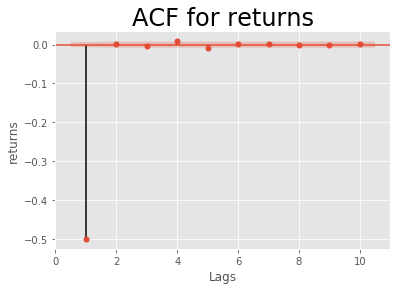

In [132]:
sgt.plot_acf(df3.returns[1:],lags=10,zero=False)
plt.xlabel('Lags')
plt.ylabel('returns')
plt.title("ACF for returns",size=24)

In [133]:
# Returns are stationary means they are not autocorrelated as shown by above ACF

In [124]:
model_ret_ma_1 = ARMA(df3.returns,order=(0,1))
results_ret_ma_1 = model_ret_ma_1.fit()
results_ret_ma_1.summary()

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                96326
Model:                     ARMA(0, 1)   Log Likelihood             -173089.785
Method:                       css-mle   S.D. of innovations              1.459
Date:                Tue, 19 May 2020   AIC                         346185.571
Time:                        21:05:06   BIC                         346213.997
Sample:                             0   HQIC                        346194.212
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0199      0.000     69.083      0.000       0.019       0.021
ma.L1.returns    -0.9386      0.001   -804.398      0.000      -0.941      -0.936
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0654           +0.0000j            1.0654            0.0000
-----------------------------------------------------------------------------
"""

In [135]:
# order component is 0,1 - (AR component, MA Component)
# 1st order lag is significant
# Now fitting higher models

In [134]:
model_ret_ma_2 = ARMA(df3.returns,order=(0,2))
results_ret_ma_2 = model_ret_ma_2.fit()
results_ret_ma_2.summary()
print(results_ret_ma_2.summary())
#print("LLR Test: " + str(LLR(results_ret_ma_1,results_ret_ma_2)))

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                96326
Model:                     ARMA(0, 2)   Log Likelihood             -173089.505
Method:                       css-mle   S.D. of innovations              1.459
Date:                Tue, 19 May 2020   AIC                         346187.010
Time:                        21:11:42   BIC                         346224.912
Sample:                             0   HQIC                        346198.532
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0199      0.000     69.283      0.000       0.019       0.021
ma.L1.returns    -0.9364      0.003   -291.921      0.000      -0.943      -0.930
ma.L2.returns    -0.0024      0.003     

In [138]:
## 2nd lag model is not significant as p value is 0.454
## Checking for higher models

In [149]:
# Check for higher lagged models - until you get a high significant model
# Regularly do LLR test to compare different models

In [137]:
# Skipping some videos on MA Models

# ARMA

In [138]:
# The ARMA models contain the both past values(like the AR) and past errors(like the MA)

In [71]:
model_ret_ar_1_ma_1 = ARMA(df3.returns,order=(1,1))
results_ret_ar_1_ma_1 = model_ret_ar_1_ma_1.fit()
results_ret_ar_1_ma_1.summary()
#print(results_ret_ma_2.summary())

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                96326
Model:                     ARMA(1, 1)   Log Likelihood             -173089.502
Method:                       css-mle   S.D. of innovations              1.459
Date:                Sat, 23 May 2020   AIC                         346187.004
Time:                        13:42:19   BIC                         346224.906
Sample:                             0   HQIC                        346198.526
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0199      0.000     69.286      0.000       0.019       0.021
ar.L1.returns     0.0026      0.003      0.753      0.452      -0.004       0.009
ma.L1.returns    -0.9389      0.001   -754.279      0.000      -0.941      -0.936
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          384.4850           +0.0000j          384.4850            0.0000
MA.1            1.0650           +0.0000j            1.0650            0.0000
-----------------------------------------------------------------------------
"""

In [141]:
print("LLR Test MA VS ARMA: " + str(LLR(results_ret_ma_1,results_ret_ar_1_ma_1)))
print("LLR Test AR VS ARMA: " + str(LLR(results_ret_ar_1,results_ret_ar_1_ma_1)))

LLR Test MA VS ARMA: 0.452
LLR Test AR VS ARMA: 0.0


In [ ]:
# The above LLR test proves that MA1 model was better than ARMA 1 (MA model was useful in predict present residual based on
# past residual)
# However ARMA1 was better than MA1(MA works on values not residual)

In [74]:
model_ret_ar_2_ma_2 = ARMA(df3.returns,order=(2,2))
results_ret_ar_2_ma_2 = model_ret_ar_2_ma_2.fit()
#results_ret_ar_2_ma_2.summary()

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [142]:
print("LLR Test MA VS ARMA: " + str(LLR(results_ret_ma_2,results_ret_ar_2_ma_2)))
print("LLR Test AR VS ARMA: " + str(LLR(results_ret_ar_2,results_ret_ar_2_ma_2)))

LLR Test MA VS ARMA: 0.084
LLR Test AR VS ARMA: 0.0


In [ ]:
# ARMA2 is btter value predictor than AR 2
# MA2 is better residual predictor than ARMA2

In [143]:
model_ret_ar_8_ma_6 = ARMA(df3.returns,order=(8,6))
results_ret_ar_8_ma_6 = model_ret_ar_8_ma_6.fit()
results_ret_ar_8_ma_6.summary()

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                96326
Model:                     ARMA(8, 6)   Log Likelihood             -173073.780
Method:                       css-mle   S.D. of innovations              1.459
Date:                Tue, 19 May 2020   AIC                         346179.559
Time:                        22:24:35   BIC                         346331.167
Sample:                             0   HQIC                        346225.646
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0199      0.000     70.651      0.000       0.019       0.021
ar.L1.returns     0.1045      0.241      0.434      0.664      -0.368       0.577
ar.L2.returns    -0.8437      0.130     -6.487      0.000      -1.099      -0.589
ar.L3.returns     0.0857      0.261      0.328      0.743      -0.425       0.597
ar.L4.returns    -0.7426      0.125     -5.957      0.000      -0.987      -0.498
ar.L5.returns    -0.4114      0.240     -1.715      0.086      -0.882       0.059
ar.L6.returns     0.0173      0.005      3.496      0.000       0.008       0.027
ar.L7.returns     0.0026      0.004      0.638      0.523      -0.005       0.010
ar.L8.returns     0.0097      0.004      2.667      0.008       0.003       0.017
ma.L1.returns    -1.0409      0.241     -4.320      0.000      -1.513      -0.569
ma.L2.returns     0.9438      0.356      2.655      0.008       0.247       1.641
ma.L3.returns    -0.8774      0.383     -2.292      0.022      -1.627      -0.127
ma.L4.returns     0.8301      0.372      2.232      0.026       0.101       1.559
ma.L5.returns    -0.2980      0.361     -0.826      0.409      -1.005       0.409
ma.L6.returns    -0.3908      0.227     -1.721      0.085      -0.836       0.054
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6350           -0.7833j            1.0083           -0.1416
AR.2            0.6350           +0.7833j            1.0083            0.1416
AR.3           -0.3648           -0.9323j            1.0012           -0.3094
AR.4           -0.3648           +0.9323j            1.0012            0.3094
AR.5           -2.0403           -0.0000j            2.0403           -0.5000
AR.6            3.7676           -0.0000j            3.7676           -0.0000
AR.7           -1.2669           -3.4050j            3.6331           -0.3067
AR.8           -1.2669           +3.4050j            3.6331            0.3067
MA.1            1.0623           -0.0000j            1.0623           -0.0000
MA.2            0.6351           -0.7826j            1.0078           -0.1415
MA.3            0.6351           +0.7826j            1.0078            0.1415
MA.4           -0.3651           -0.9325j            1.0015           -0.3094
MA.5           -0.3651           +0.9325j            1.0015            0.3094
MA.6           -2.3648           -0.0000j            2.3648           -0.5000
-----------------------------------------------------------------------------
"""

In [62]:
# Observing MA coeffecients which are not significant with model ma.L5 and above as the p values are above 0.05, we can move to
# simpler lag ma model till MA4
# With AR model, the coefficients are not telling a very straightforward story as some models are signficant while others are not
# Lets take a model half such as ARMA(3,3)

In [72]:
model_ret_ar_3_ma_3 = ARMA(df3.returns,order=(3,3))
results_ret_ar_3_ma_3 = model_ret_ar_3_ma_3.fit()

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [73]:
LLR(results_ret_ar_1_ma_1,results_ret_ar_3_ma_3,DF=4)

0.522

In [75]:
results_ret_ar_3_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                96326
Model:                     ARMA(3, 3)   Log Likelihood             -173087.894
Method:                       css-mle   S.D. of innovations              1.459
Date:                Sat, 23 May 2020   AIC                         346191.788
Time:                        13:49:18   BIC                         346267.592
Sample:                             0   HQIC                        346214.832
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0199      0.000     69.368      0.000       0.019       0.021
ar.L1.returns    -1.3290      0.574     -2.314      0.021      -2.454      -0.204
ar.L2.returns    -0.5584      0.390     -1.431      0.152      -1.323       0.206
ar.L3.returns     0.0016      0.006      0.255      0.799      -0.011       0.014
ma.L1.returns     0.3927      0.574      0.684      0.494      -0.733       1.518
ma.L2.returns    -0.6860      0.300     -2.285      0.022      -1.274      -0.097
ma.L3.returns    -0.5302      0.368     -1.442      0.149      -1.251       0.191
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1844           -0.6130j            1.3336           -0.4240
AR.2           -1.1844           +0.6130j            1.3336            0.4240
AR.3          340.9983           -0.0000j          340.9983           -0.0000
MA.1            1.0649           -0.0000j            1.0649           -0.0000
MA.2           -1.1793           -0.6167j            1.3308           -0.4233
MA.3           -1.1793           +0.6167j            1.3308            0.4233
-----------------------------------------------------------------------------
"""

In [76]:
LLR(results_ret_ar_2_ma_2,results_ret_ar_3_ma_3,DF=2)

0.89

In [77]:
model_ret_ar_1_ma_2 = ARMA(df3.returns,order=(1,2))
results_ret_ar_1_ma_2 = model_ret_ar_1_ma_2.fit()

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [78]:
LLR(results_ret_ar_1_ma_1,results_ret_ar_1_ma_2,DF=1)

0.0

In [80]:
LLR(results_ret_ar_2_ma_2,results_ret_ar_1_ma_2,DF=1)

0.0

In [79]:
results_ret_ar_1_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                96326
Model:                     ARMA(1, 2)   Log Likelihood             -173077.424
Method:                       css-mle   S.D. of innovations              1.459
Date:                Sat, 23 May 2020   AIC                         346164.849
Time:                        13:56:20   BIC                         346212.226
Sample:                             0   HQIC                        346179.251
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0199      0.000     76.945      0.000       0.019       0.020
ar.L1.returns     0.9482      0.009    100.377      0.000       0.930       0.967
ma.L1.returns    -1.8823      0.010   -191.533      0.000      -1.902      -1.863
ma.L2.returns     0.8852      0.009     95.293      0.000       0.867       0.903
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0547           +0.0000j            1.0547            0.0000
MA.1            1.0355           +0.0000j            1.0355            0.0000
MA.2            1.0910           +0.0000j            1.0910            0.0000
-----------------------------------------------------------------------------
"""

In [82]:
# ARMA(1,2) model has resulted in the most efficient model
# Also absolute values of coefficient for ma model are decreased from 1.8823 to 0.8852, this means that residuals are reduced

# Residuals for ARMA

In [95]:
df3['resid_results_ret_ar_1_ma_2'] = results_ret_ar_1_ma_2.resid

C:\Users\TAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


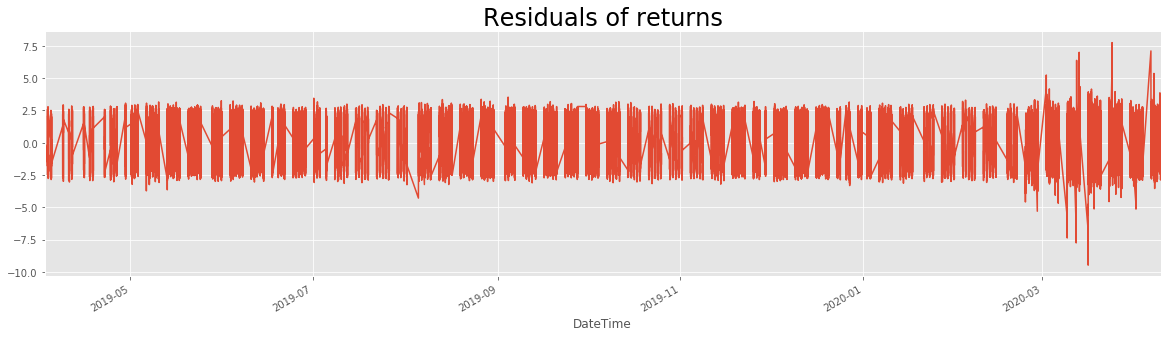

In [97]:
df3.resid_results_ret_ar_1_ma_2.plot(figsize=(20,5))
plt.title('Residuals of returns',size=24)
plt.show()

Text(0.5, 1.0, 'ACF LAG')

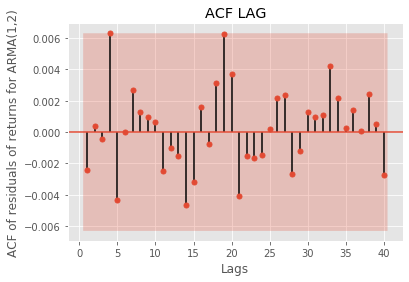

In [98]:
sgt.plot_acf(df3.resid_results_ret_ar_1_ma_2,lags=40,zero=False)
plt.xlabel('Lags')
plt.ylabel('ACF of residuals of returns for ARMA(1,2)')
plt.title("ACF LAG")

# ACF is helpful for understanding if residuals represesnt White Noise

In [99]:
# As all the residuals are within significance level we can say that all are significant or different or not autocorrelated or
# represents white noise


In [100]:
# ARMA Model works better while modeling stationary time series data such as returns
# as the log likelihood for returns is higher than that of market prices

# ARIMA(Autoregressive Integrated Moving Average)

### To model non stationary data, ARIMA(Autoregressive Integrated Moving Average) model comes into picture

#### Models the difference between prices(across periods) instead of pricee. The purpose of the model is to ensure stationarity no matter what the underlying data is.

#### ARIMA model is nothing but an ARMA model applied on the newly generated time series from the difference in prices

### ARIMA (1,1,1)

In [41]:
df3.head()

,marketClose,returns
DateTime,,
2019-04-02 09:31:00,292.97,-2.343333
2019-04-02 09:32:00,295.12,0.733864
2019-04-02 09:33:00,296.28,0.393060
2019-04-02 09:34:00,296.57,0.097880
2019-04-02 09:35:00,297.90,0.448461


In [42]:
model_ar_1_i_1_ma_1 = ARIMA(df3.marketClose,order=(1,1,1))
result_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
result_ar_1_i_1_ma_1.summary()

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.marketClose   No. Observations:                96325
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -280399.550
Method:                       css-mle   S.D. of innovations              4.446
Date:                Mon, 25 May 2020   AIC                         560807.100
Time:                        12:51:52   BIC                         560845.002
Sample:                             1   HQIC                        560818.621
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -7.667e-05      0.001     -0.103      0.918      -0.002       0.001
ar.L1.D.marketClose     0.0030      0.003      0.872      0.383      -0.004       0.010
ma.L1.D.marketClose    -0.9482      0.001   -828.541      0.000      -0.950      -0.946
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          335.1623           +0.0000j          335.1623            0.0000
MA.1            1.0546           +0.0000j            1.0546            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
# MA1 is significant but AR1 is not significant , may be higher lag models are better
# If you see returns for ARMA (1,1) it is similar to what we see now in ARIMA(1,1,1) , it is because ARIMA is tranforming the 
# prices into stationary form by taking differences instead of calculating returns


### ARIMA (1,1,1) Residuals

C:\Users\TAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'ACF for residuals for ARIMA(1,1,1)')

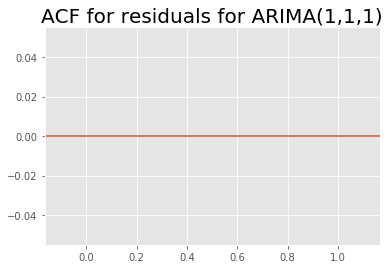

In [43]:
df3['res_ar_1_i_1_ma_1'] = result_ar_1_i_1_ma_1.resid
sgt.plot_acf(df3['res_ar_1_i_1_ma_1'],zero=False, lags=40)
plt.title("ACF for residuals for ARIMA(1,1,1)",size=20)

In [45]:
# The ACF failed to compute due to the missing first element
# Remove the first row of the dataframe

In [46]:
#df3 = df3.iloc[1:]

C:\Users\TAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'ACF for residuals for ARIMA(1,1,1)')

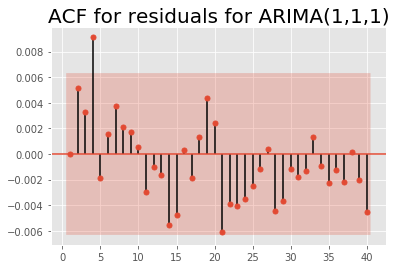

In [50]:
df3['res_ar_1_i_1_ma_1'] = result_ar_1_i_1_ma_1.resid
sgt.plot_acf(df3['res_ar_1_i_1_ma_1'][1:],zero=False, lags=40)
plt.title("ACF for residuals for ARIMA(1,1,1)",size=20)

In [51]:
# Including 4th lag in our model will improve our performance

In [52]:
# Higher lag models

In [ ]:
# ARIMA(3,4)

In [53]:
model_ar_3_i_1_ma_4 = ARIMA(df3.marketClose,order=(3,1,4))
result_ar_3_i_1_ma_4 = model_ar_3_i_1_ma_4.fit()
result_ar_3_i_1_ma_4.summary()

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.marketClose   No. Observations:                96325
Model:                 ARIMA(3, 1, 4)   Log Likelihood             -280395.765
Method:                       css-mle   S.D. of innovations              4.446
Date:                Mon, 25 May 2020   AIC                         560809.530
Time:                        13:21:17   BIC                         560894.810
Sample:                             1   HQIC                        560835.454
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -7.253e-05      0.001     -0.097      0.923      -0.002       0.001
ar.L1.D.marketClose    -2.0976      0.070    -29.955      0.000      -2.235      -1.960
ar.L2.D.marketClose    -2.0818      0.080    -25.918      0.000      -2.239      -1.924
ar.L3.D.marketClose    -0.9471      0.069    -13.691      0.000      -1.083      -0.811
ma.L1.D.marketClose     1.1496      0.071     16.240      0.000       1.011       1.288
ma.L2.D.marketClose     0.0943      0.015      6.112      0.000       0.064       0.124
ma.L3.D.marketClose    -1.0272      0.009   -115.637      0.000      -1.045      -1.010
ma.L4.D.marketClose    -0.8975      0.066    -13.505      0.000      -1.028      -0.767
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0458           -0.0000j            1.0458           -0.5000
AR.2           -0.5762           -0.8232j            1.0048           -0.3472
AR.3           -0.5762           +0.8232j            1.0048            0.3472
MA.1            1.0550           -0.0000j            1.0550           -0.0000
MA.2           -0.5762           -0.8226j            1.0043           -0.3472
MA.3           -0.5762           +0.8226j            1.0043            0.3472
MA.4           -1.0470           -0.0000j            1.0470           -0.5000
-----------------------------------------------------------------------------
"""

C:\Users\TAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'ACF for residuals for ARIMA(3,1,4)')

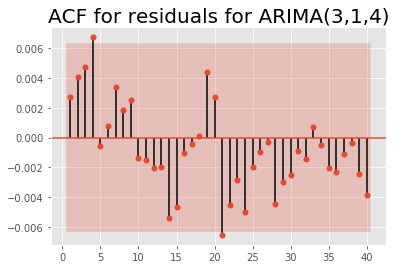

In [56]:
df3['res_ar_3_i_1_ma_4'] = result_ar_3_i_1_ma_4.resid
sgt.plot_acf(df3['res_ar_3_i_1_ma_4'][1:],zero=False, lags=40)
plt.title("ACF for residuals for ARIMA(3,1,4)",size=20)

In [61]:
# Higher model ARIMA(3,1,4) is highly significant so we check for LLR test to compare two models
LLR(result_ar_1_i_1_ma_1,result_ar_3_i_1_ma_4,DF=2)

0.023

In [62]:
# at 5% level, ARIMA (3,1,4) has high significance than ARIMA model (1,1,1)

### ARIMA (4,1,4)

In [63]:
# Checking for higher lag model
model_ar_4_i_1_ma_4 = ARIMA(df3.marketClose,order=(4,1,4))
result_ar_4_i_1_ma_4 = model_ar_4_i_1_ma_4.fit()
result_ar_4_i_1_ma_4.summary()

C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\TAN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.marketClose   No. Observations:                96325
Model:                 ARIMA(4, 1, 4)   Log Likelihood             -280383.027
Method:                       css-mle   S.D. of innovations              4.445
Date:                Mon, 25 May 2020   AIC                         560786.054
Time:                        13:36:08   BIC                         560880.809
Sample:                             1   HQIC                        560814.858
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -7.776e-05      0.001     -0.116      0.908      -0.001       0.001
ar.L1.D.marketClose    -0.2077      0.024     -8.682      0.000      -0.255      -0.161
ar.L2.D.marketClose     0.0795      0.026      3.017      0.003       0.028       0.131
ar.L3.D.marketClose     0.9283      0.023     40.101      0.000       0.883       0.974
ar.L4.D.marketClose     0.0044      0.004      1.208      0.227      -0.003       0.011
ma.L1.D.marketClose    -0.7377      0.024    -31.107      0.000      -0.784      -0.691
ma.L2.D.marketClose    -0.2736      0.011    -23.844      0.000      -0.296      -0.251
ma.L3.D.marketClose    -0.8537      0.014    -60.078      0.000      -0.882      -0.826
ma.L4.D.marketClose     0.8742      0.023     37.806      0.000       0.829       0.920
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.5765           -0.8236j            1.0053           -0.3472
AR.2           -0.5765           +0.8236j            1.0053            0.3472
AR.3            1.0663           -0.0000j            1.0663           -0.0000
AR.4         -212.1086           -0.0000j          212.1086           -0.5000
MA.1           -0.5765           -0.8230j            1.0048           -0.3473
MA.2           -0.5765           +0.8230j            1.0048            0.3473
MA.3            1.0351           -0.0000j            1.0351           -0.0000
MA.4            1.0945           -0.0000j            1.0945           -0.0000
-----------------------------------------------------------------------------
"""

C:\Users\TAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'ACF for residuals for ARIMA(4,1,4)')

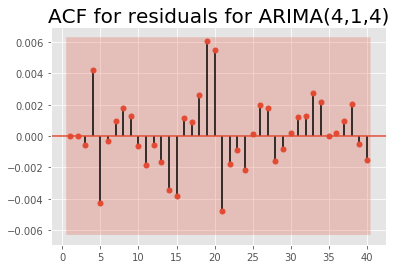

In [64]:
df3['res_ar_4_i_1_ma_4'] = result_ar_4_i_1_ma_4.resid
sgt.plot_acf(df3['res_ar_4_i_1_ma_4'][1:],zero=False, lags=40)
plt.title("ACF for residuals for ARIMA(4,1,4)",size=20)

In [65]:
LLR(result_ar_3_i_1_ma_4,result_ar_4_i_1_ma_4,DF=1)

0.0

In [66]:
# Reasons why ARIMA(4,1,4) is better than ARIMA(3,1,4)
# 1. Higher Log likelihood
# 2. Lower AIC, BIC
# 3. ACF - all lags in sigificance level
# 4. LLR - ARIMA(4,1,4) vs ARIMA (3,1,4) - 0.0